## Load Data

In [117]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import numpy as np
from sklearn.metrics import rand_score, adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
try:
    table = pd.read_pickle("data/table.pkl")
except:
    table = pd.read_excel("data/association_table_corrected_index.xlsx")
    table.to_pickle("data/table.pkl")

In [3]:
from transformer import Event
from subsampler import balanced_subsampler

NUMBER_OF_SAMPLES_PER_EVENT = 100

In [4]:

tablerich = Event().fit_transform(table)

In [5]:
balanced_table = balanced_subsampler(tablerich, NUMBER_OF_SAMPLES_PER_EVENT)
balanced_table.event.value_counts()

PIS    100
TOR    100
TR     100
HIB    100
LP     100
VT     100
EXP    100
Name: event, dtype: int64

In [6]:
from transformer import Transformer

df = Transformer("data/Extracted/").fit_transform(balanced_table)

In [7]:
df = pd.read_pickle("data/df.pkl")

In [8]:
df

,Index,Event,Duration,Event start,Event stop,Sampling rate,Overlap,npts,energy,path,...,amplitude,kurtosis,skew,variance_TF,mean_TF,median_TF,maximum_TF,amplitude_TF,kurtosis_TF,skew_TF
120756,120756,TOR,40,2010-07-20 10:09:39.090000+00:00,2010-07-20 10:10:19.090000+00:00,50.0,False,180001.0,0.02178,data/Extracted/TOR/TOR_120756.npy,...,132.0,4.534969,-0.087970,3.719319,0.362202,0.219674,83.823000,83.821955,1751.137895,40.644742
45510,45510,HIB,34,2007-10-01 20:13:48.720000+00:00,2007-10-01 20:14:22.720000+00:00,50.0,False,180001.0,0.07122,data/Extracted/HIB/HIB_45510.npy,...,198.0,2.879214,0.102819,9.608899,0.659194,0.303121,125.169412,125.168936,1528.187728,38.138024
97638,97638,PIS,20,2007-12-26 13:00:41.930000+00:00,2007-12-26 13:01:01.930000+00:00,50.0,False,180001.0,0.23279,data/Extracted/PIS/PIS_97638.npy,...,1198.0,5.351756,0.220302,44.853150,3.757604,1.044429,114.334000,114.307902,76.907955,6.046874
5101,5101,EXP,40,2006-06-13 06:46:02.010000+00:00,2006-06-13 06:46:42.010000+00:00,100.0,False,360001.0,316.71740,data/Extracted/EXP/EXP_5101.npy,...,38413.0,0.518151,0.261402,69129.441032,86.283524,3.608489,4887.105973,4887.079673,87.423590,7.177932
95871,95871,HIB,32,2007-11-30 03:32:32.180000+00:00,2007-11-30 03:33:04.180000+00:00,50.0,False,180001.0,0.33914,data/Extracted/HIB/HIB_95871.npy,...,1036.0,2.533481,-0.119049,29.723709,2.954830,1.016797,140.466250,140.465836,254.217738,11.206638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98489,98489,PIS,53,2008-08-01 21:24:16.940000+00:00,2008-08-01 21:25:09.940000+00:00,50.0,False,180001.0,3.92816,data/Extracted/PIS/PIS_98489.npy,...,55.0,0.515551,-0.144285,6.873813,0.199446,0.092768,134.579623,134.579384,2601.355179,50.816088
98911,98911,HIB,29,2008-01-29 20:53:07.090000+00:00,2008-01-29 20:53:36.090000+00:00,50.0,False,180001.0,0.21679,data/Extracted/HIB/HIB_98911.npy,...,843.0,3.207598,-0.388291,24.663111,2.570040,0.779107,125.932414,125.931034,262.401846,11.554985
98604,98604,PIS,50,2008-09-01 23:50:00.450000+00:00,2008-09-01 23:50:50.450000+00:00,50.0,False,180001.0,0.66128,data/Extracted/PIS/PIS_98604.npy,...,26.0,0.236100,-0.039151,5.618219,0.141325,0.068098,118.487200,118.486400,2482.851592,49.788224
31134,31134,LP1,36,2006-09-09 05:32:44+00:00,2006-09-09 05:33:20+00:00,40.0,False,143999.0,0.03155,data/Extracted/LP/LP_31134.npy,...,1118.0,1.051852,-0.210275,195.351638,4.619791,2.093823,477.154167,477.122403,905.152862,27.173091


In [9]:
df.to_pickle('data/df.pkl')

In [10]:
all_features = ["variance", "mean", "median", "maximum", "amplitude", "Duration", "energy", "skew", "kurtosis", "variance_TF", "mean_TF", "median_TF", "maximum_TF", "amplitude_TF", "kurtosis_TF", "skew_TF"]
liste_features_selected=['energy', 'Duration', 'mean_TF', 'variance_TF', 'median_TF','variance', 'mean','kurtosis_TF']
features = liste_features_selected

In [11]:
df[features]

,energy,Duration,mean_TF,variance_TF,median_TF,variance,mean,kurtosis_TF
120756,0.02178,40,0.362202,3.719319,0.219674,1.686807e+02,41.911499,1751.137895
45510,0.07122,34,0.659194,9.608899,0.303121,3.516146e+02,62.584705,1528.187728
97638,0.23279,20,3.757604,44.853150,1.044429,1.147512e+04,57.167000,76.907955
5101,316.71740,40,86.283524,69129.441032,3.608489,7.645973e+07,338.469238,87.423590
95871,0.33914,32,2.954830,29.723709,1.016797,1.044920e+04,70.233124,254.217738
...,...,...,...,...,...,...,...,...
98489,3.92816,53,0.199446,6.873813,0.092768,5.233563e+01,67.289810,2601.355179
98911,0.21679,29,2.570040,24.663111,0.779107,7.369986e+03,62.966206,262.401846
98604,0.66128,50,0.141325,5.618219,0.068098,1.406586e+01,59.243599,2482.851592
31134,0.03155,36,4.619791,195.351638,2.093823,2.109085e+04,-238.577087,905.152862


In [66]:
results = pd.DataFrame(index = ["Ground", "KMeans", "OPTICS","BIRCH"])

## Ground truth

In [48]:
from sklearn.preprocessing import LabelEncoder

real_labels = LabelEncoder().fit_transform(balanced_table.event.values)

In [67]:
results.loc["Ground", "gini"] = gini(real_labels)
gini(real_labels)

0.8571428571428572

In [113]:
results.loc["Ground", "silhouette"] = silhouette_score(df[features], real_labels)
silhouette_score(df[features], real_labels)

-0.15980791622472865

In [70]:
results.loc["Ground", "rand"] = 1.0

In [119]:
results.loc["Ground", "n_classes"] = 7

## K-Means Clustering

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(7)

kmeans.fit(df[features])

KMeans(n_clusters=7)

### Imbalance measure

In [13]:
from gini import gini

In [71]:
results.loc["KMeans", "gini"] = gini(kmeans.labels_)
gini(kmeans.labels_)

0.13408571428571425

### Rand Index

In [72]:
rand_score(kmeans.labels_, real_labels)

0.237764152871449

In [73]:
results.loc["KMeans", "rand"] = adjusted_rand_score(kmeans.labels_, real_labels)
adjusted_rand_score(kmeans.labels_, real_labels)

-0.00014248265975672571

### Silhouette

In [74]:
results.loc["KMeans", "silhouette"] = silhouette_score(df[features], kmeans.labels_)
silhouette_score(df[features], kmeans.labels_)

0.9578472015341608

### Number of classes

In [120]:
results.loc["KMeans", "n_classes"] = len(np.unique(kmeans.labels_))

## OPTICS

In [75]:
from sklearn.cluster import OPTICS

optics = OPTICS()

optics.fit(df[features])

results.loc["OPTICS", "rand"] = adjusted_rand_score(optics.labels_, real_labels)
adjusted_rand_score(optics.labels_, real_labels)

-0.0002619767551733913

In [110]:
dict(zip(*np.unique(optics.labels_, return_counts = True)))

{-1: 321,
 0: 11,
 1: 6,
 2: 5,
 3: 11,
 4: 8,
 5: 15,
 6: 5,
 7: 10,
 8: 13,
 9: 6,
 10: 7,
 11: 7,
 12: 12,
 13: 11,
 14: 6,
 15: 6,
 16: 12,
 17: 8,
 18: 5,
 19: 15,
 20: 7,
 21: 16,
 22: 9,
 23: 7,
 24: 9,
 25: 9,
 26: 10,
 27: 7,
 28: 7,
 29: 5,
 30: 7,
 31: 5,
 32: 16,
 33: 9,
 34: 7,
 35: 5,
 36: 7,
 37: 14,
 38: 8,
 39: 10,
 40: 9,
 41: 10,
 42: 7}

In [78]:
results.loc["OPTICS", "gini"] = gini(optics.labels_)
gini(optics.labels_)

0.5337571428571429

In [77]:
results.loc["OPTICS", "silhouette"] = silhouette_score(df[features], optics.labels_)
silhouette_score(df[features], optics.labels_)

-0.11244162071961697

In [121]:
results.loc["OPTICS", "n_classes"] = len(np.unique(optics.labels_))

## Affinity propagation

In [45]:
from sklearn.cluster import AffinityPropagation

aff = AffinityPropagation()

aff.fit(df[features])

print(adjusted_rand_score(aff.labels_, real_labels))

0.0


/home/d5learner-01/anaconda3/envs/volca3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(


## BIRCH

In [122]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=7)

birch.fit(df[features])

results.loc["BIRCH", "rand"] = adjusted_rand_score(birch.labels_, real_labels)
print(adjusted_rand_score(birch.labels_, real_labels))

results.loc["BIRCH", "gini"] = gini(birch.labels_)
print(gini(birch.labels_))

results.loc["BIRCH", "silhouette"] = silhouette_score(df[features], birch.labels_)
print(silhouette_score(df[features], birch.labels_))

results.loc["BIRCH", "n_classes"] = len(np.unique(birch.labels_))

-0.0001595725922240727
0.1341551020408163
0.9580731208105171


/home/d5learner-01/anaconda3/envs/volca3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  warnings.warn(


In [80]:
dict(zip(*np.unique(birch.labels_, return_counts=True)))

{0: 10, 1: 12, 2: 11, 3: 651, 4: 3, 5: 8, 6: 5}

## Viz

In [123]:
results

,gini,silhouette,rand,n_classes
Ground,0.857143,-0.159808,1.000000,7.0
KMeans,0.134086,0.957847,-0.000142,7.0
OPTICS,0.533757,-0.112442,-0.000262,44.0
BIRCH,0.134155,0.958073,-0.000160,7.0


### Accord

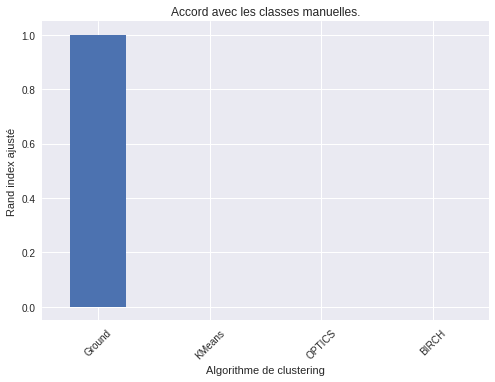

In [105]:
ax = results.rand.plot.bar()
ax.set_title("Accord avec les classes manuelles.")
ax.set_ylabel("Rand index ajusté")
ax.set_xlabel("Algorithme de clustering")
plt.xticks(rotation = 45)
plt.show()

### Déséquilibre

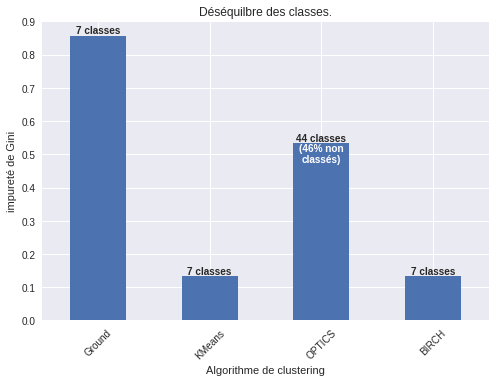

In [134]:
ax = results.gini.plot.bar()
ax.set_title("Déséquilbre des classes.")
ax.set_ylabel("impureté de Gini")
ax.set_xlabel("Algorithme de clustering")

rects = ax.patches
labels = results.n_classes.to_list()

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2 , height, str(int(label)) + " classes", ha="center", va="bottom", weight = "bold"
    )

rect = rects[2]
height = rect.get_height()
ax.text(
    rect.get_x() + rect.get_width() / 2 , height, "(46% non\nclassés)", ha="center", va="top", weight = "bold", color = "white"
)

plt.xticks(rotation = 45)
plt.show()

### Qualité

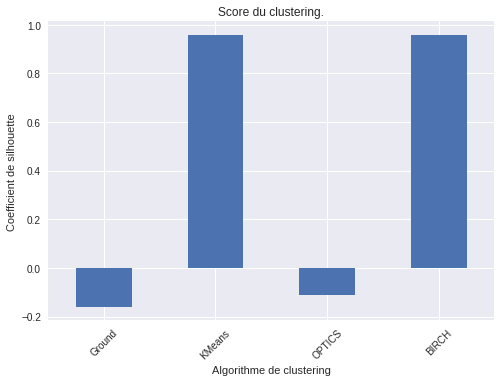

In [115]:
ax = results.silhouette.plot.bar()
ax.set_title("Score du clustering.")
ax.set_ylabel("Coefficient de silhouette")
ax.set_xlabel("Algorithme de clustering")
plt.xticks(rotation = 45)
plt.show()